In [18]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import seaborn as sb

plt.style.use("science")

from copia.hill import empirical_hill
from copia.utils import evenness

In [6]:
q_min, q_max, step = 0, 3, 0.1
q = np.arange(q_min, q_max + step, step)

## Network topologies:

Watts-Strogatz graph (sensu Lipo et al.):

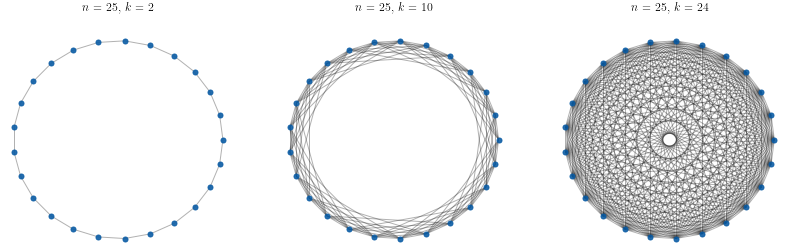

In [8]:
%matplotlib inline

degrees = 2, 10, 24
n_agents = 25

fig, axes = plt.subplots(ncols=len(degrees), figsize=(14, 4))
axes = axes.flatten()

for i, degree in enumerate(degrees):
    G = nx.watts_strogatz_graph(n=25, k=degree, p=0.0, seed=n_agents)
    pos = nx.kamada_kawai_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size=25, alpha=0.9, node_color="C0", ax=axes[i])
    nx.draw_networkx_edges(G, pos, alpha=0.3, ax=axes[i])
    axes[i].set_title(f'$n$ = {n_agents}, $k$ = {degree}', pad=20)
    axes[i].axis('off')

In [61]:
data = np.load("20211028131135.npz")
params, populations = data["params"], data["populations"]

In [62]:
{size: i for i, size in enumerate(np.unique(params[:, 0]))}

{100.0: 0, 500.0: 1, 1000.0: 2}

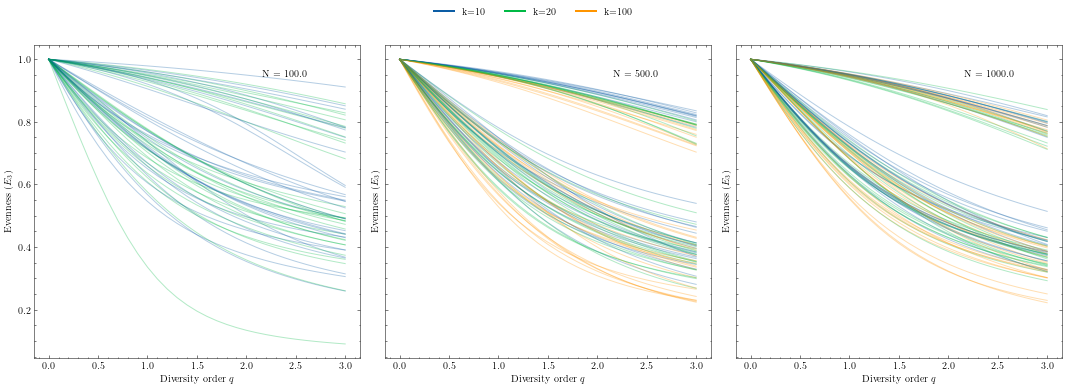

In [64]:
from matplotlib.lines import Line2D

evenness_data, evenness_cv_data = [], []

q_values = np.arange(0, 3.1, 0.1)

pop_size_index = {size: i for i, size in enumerate(np.unique(params[:, 0]))}
degree_index = {k: i for i, k in enumerate(np.unique(params[:, 1]))}
    
fig, axes = plt.subplots(ncols=len(pop_size_index), figsize=(15, 5), sharey=True)

for j, population in enumerate(populations):
    _, counts = np.unique(population[population > 0], return_counts=True)
    emp = empirical_hill(counts, q_values)
    even = (emp - 1) / (emp[0] - 1)
    ax = axes[pop_size_index[params[j, 0]]]
    ax.plot(
        q_values,
        even,
        alpha=0.3,
        color=f"C{degree_index[params[j, 1]]}"
    )

for size, i in pop_size_index.items():
    axes[i].set(xlabel="Diversity order $q$", ylabel="Evenness ($E_3$)")
    axes[i].text(0.7, 0.9, f"N = {size}", transform=axes[i].transAxes)
    axes[i].tick_params(axis='y', which='minor', left=True)

labels, indices = zip(*degree_index.items())
custom_lines = [Line2D([0], [0], color=f"C{i}", lw=2) for i in indices]
fig.legend(custom_lines, [f'k={int(k)}' for k in labels], 
          loc="upper center", ncol=len(set(labels)), bbox_to_anchor=(0.5, 1.1), frameon=False)

plt.tight_layout()
plt.savefig("../outputs/network-evenness.pdf", bbox_inches='tight')